#Imports

In [2]:
import cv2
!pip install face_recognition
import face_recognition
import os

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=04be30cb2857662cff953a036166a054f01f90414bf5f6055539e54d8ff29666
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


#Snapshot-When-Face-Is-Detected

In [3]:
# Load the video file
video_capture = cv2.VideoCapture('/content/drive/MyDrive/FaceDetection/TestVideoMilaKunis.mp4')

while True:
    success, frame = video_capture.read()

    if not success:
        print("Error reading video file")
        break

    # Detect the face locations
    face_locations = face_recognition.face_locations(frame)

    # If a face is detected, save a snapshot of the frame
    if len(face_locations) > 0:
        # Save the frame as an image file
        cv2.imwrite('/content/drive/MyDrive/FaceDetection/output.jpg', frame)
        print("Snapshot saved!")

        # Exit the loop after saving the snapshot
        break

# Release the video capture object
video_capture.release()


Snapshot saved!


#Vectorised_TargetFace

In [4]:


image = cv2.imread("/content/drive/MyDrive/FaceDetection/output.jpg")

# Find the locations of the faces in the image
face_locations = face_recognition.face_locations(image)

# Loop over each face and draw a rectangle around it
for top, right, bottom, left in face_locations:
    cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)

cv2.imwrite("/content/drive/MyDrive/FaceDetection/Test_Dataset/Mila_test.jpg", image)


True

#Comparing_DS

In [5]:


# Load the images and encode the faces
known_faces = []
known_names = []

for person_name in os.listdir("/content/drive/MyDrive/FaceDetection/Train_Dataset"):
    person_path = os.path.join("/content/drive/MyDrive/FaceDetection/Train_Dataset", person_name)
    for image_name in os.listdir(person_path):
        image_path = os.path.join(person_path, image_name)
        image = face_recognition.load_image_file(image_path)
        encoding = face_recognition.face_encodings(image)[0]
        known_faces.append(encoding)
        known_names.append(person_name)




In [ ]:
known_names

['Mila Kunis',
 'Mila Kunis',
 'Mila Kunis',
 'Sofia Vergara',
 'Sofia Vergara',
 'Sofia Vergara']

In [ ]:
known_faces

[array([-0.13117912,  0.0920485 ,  0.05001328, -0.0589243 , -0.07636537,
        -0.06652416,  0.03459017, -0.15398204,  0.26755306, -0.14006424,
         0.10162675, -0.01980754, -0.28064817,  0.12767234, -0.10649253,
         0.10197197, -0.15348256, -0.19177921, -0.01076382, -0.06456101,
         0.10518461, -0.02708066,  0.07160147,  0.17059392, -0.1426651 ,
        -0.28717923, -0.14439161, -0.05917321, -0.02862406, -0.11532742,
         0.08936524,  0.09219193, -0.24633682,  0.00207757, -0.04359563,
         0.12743549, -0.0500619 , -0.11712538,  0.21134794,  0.07812829,
        -0.29094437, -0.10642922,  0.01057221,  0.37955737,  0.24184363,
         0.00313837, -0.01467163, -0.12837368,  0.20560323, -0.3161985 ,
         0.00761688,  0.19654652,  0.05671269,  0.07155537,  0.0280438 ,
        -0.12269931,  0.13814676,  0.05418906, -0.20214835,  0.01802525,
         0.17889705, -0.14828856,  0.05685746, -0.09578515,  0.22951035,
         0.07424233, -0.14132084, -0.07086286,  0.1

#Predicting_on_Test_Images

Test image for Mila Kunis.



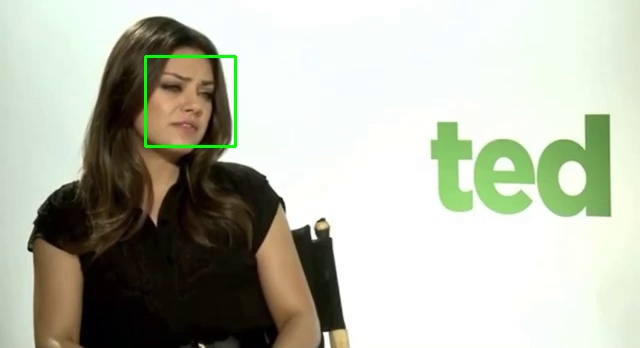

In [6]:
test_image = face_recognition.load_image_file("/content/drive/MyDrive/FaceDetection/Test_Dataset/Mila_test.jpg")
test_faces = face_recognition.face_encodings(test_image)

# Identify the faces in the test image
for test_face in test_faces:
    matches = face_recognition.compare_faces(known_faces, test_face)
    if True in matches:
        match_index = matches.index(True)
        print(f"I see {known_names[match_index]} in this image!")
    else:
        print("I don't see anyone I know in this image.")

I see Mila Kunis in this image!


Test image for Sofia Vergara.


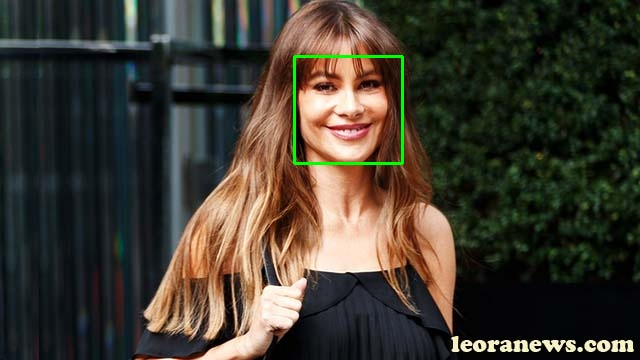

In [7]:
#Sofia_Vergara_Test

test_image = face_recognition.load_image_file("/content/drive/MyDrive/FaceDetection/Test_Dataset/Vergara_test.jpg")
test_faces = face_recognition.face_encodings(test_image)

# Identify the faces in the test image
for test_face in test_faces:
    matches = face_recognition.compare_faces(known_faces, test_face)
    if True in matches:
        match_index = matches.index(True)
        print(f"I see {known_names[match_index]} in this image!")
    else:
        print("I don't see anyone I know in this image.")

I see Sofia Vergara in this image!


Test image for Angelina Jolie

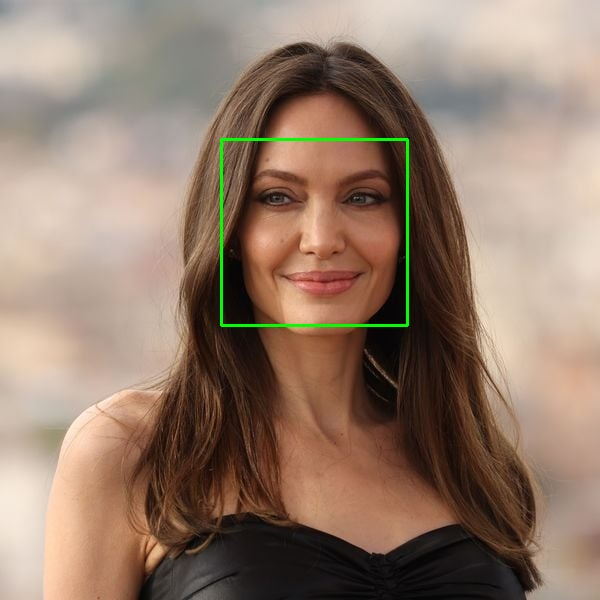

In [8]:
#Angelina_Jolie_Test

test_image = face_recognition.load_image_file("/content/drive/MyDrive/FaceDetection/Test_Dataset/Jolie_test.jpg")
test_faces = face_recognition.face_encodings(test_image)

# Identify the faces in the test image
for test_face in test_faces:
    matches = face_recognition.compare_faces(known_faces, test_face)
    if True in matches:
        match_index = matches.index(True)
        print(f"I see {known_names[match_index]} in this image!")
    else:
        print("I don't see anyone I know in this image.")

I don't see anyone I know in this image.


Test image for Sandra Bullock

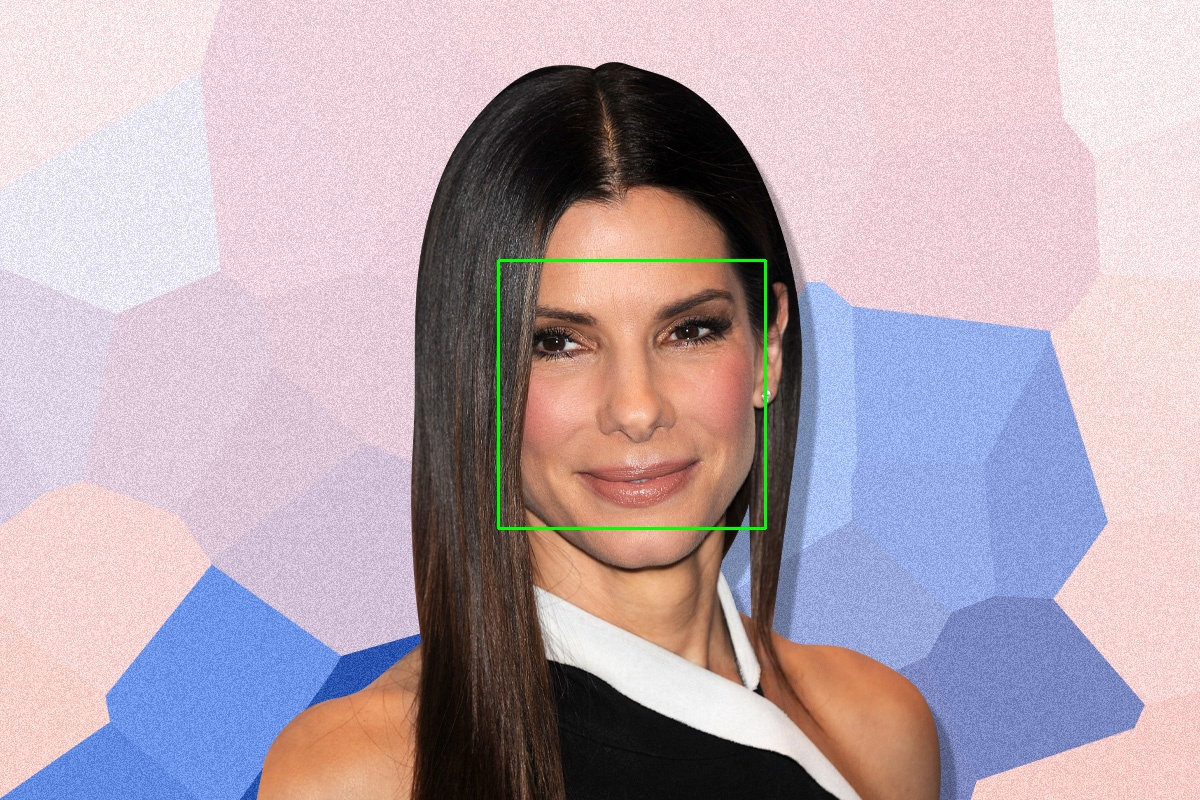

In [9]:
#Sandra_Bullock_Test

test_image = face_recognition.load_image_file("/content/drive/MyDrive/FaceDetection/Test_Dataset/sandra.jpg")
test_faces = face_recognition.face_encodings(test_image)

# Identify the faces in the test image
for test_face in test_faces:
    matches = face_recognition.compare_faces(known_faces, test_face)
    if True in matches:
        match_index = matches.index(True)
        print(f"I see {known_names[match_index]} in this image!")
    else:
        print("I don't see anyone I know in this image.")

I don't see anyone I know in this image.


Test image for Mila Kunis

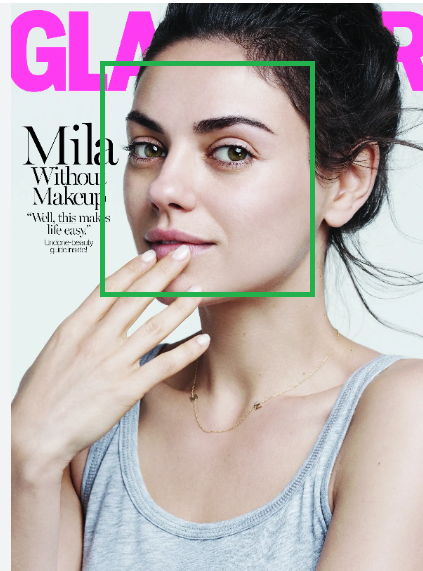

In [10]:
#Mila_Kunis

test_image = face_recognition.load_image_file("/content/drive/MyDrive/FaceDetection/Test_Dataset/Mila-Kunis.png")
test_faces = face_recognition.face_encodings(test_image)

# Identify the faces in the test image
for test_face in test_faces:
    matches = face_recognition.compare_faces(known_faces, test_face)
    if True in matches:
        match_index = matches.index(True)
        print(f"I see {known_names[match_index]} in this image!")
    else:
        print("I don't see anyone I know in this image.")

I see Mila Kunis in this image!
